### Values

In [1]:
ITERATIONS = 20
TEST_SIZE = 0.3
FEATURES = ['zipcode', 'incident_borough']
TARGET_ATTRIBUTE = 'engines_assigned_quantity'

### Read Json and validate Data

In [2]:
import pandas as pd

df = pd.read_json('/Users/loic.doerr/dev/berlin-emergency-ai/data/fire-incidents/interims.json')
df.dropna(inplace=True)

### Train Models

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

features = df[FEATURES]
target = df[TARGET_ATTRIBUTE]

features = pd.get_dummies(features)

models = []
errors = []

for iteration in range(ITERATIONS):
  features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=TEST_SIZE, random_state=iteration) 
  model = LinearRegression()
  model.fit(features_train, target_train)
  target_pred = model.predict(features_test)
  mse = metrics.mean_squared_error(target_test, target_pred)
  models.append(model)
  errors.append(mse)

print('Errors', errors)

[1.14949751 1.25316627 1.27834125 ... 1.25316627 1.25900824 1.24182557]
[1.2507146  1.25310951 1.23468692 ... 1.26135061 1.12875406 1.25952075]
[1.25082069 1.2676797  1.27245389 ... 1.23789744 1.23268924 1.24619588]
[1.27126988 1.29225899 1.15730201 ... 1.27213641 1.28251055 1.25551724]
[1.25604075 1.28191435 1.25422032 ... 1.25543394 1.22633612 1.22552705]
[1.26547578 1.24230373 1.26682272 ... 1.27900373 1.24095679 1.28102414]
[1.26197506 1.26146493 1.29696332 ... 1.26523691 1.13954853 1.23261517]
[1.38000237 1.25622989 1.27221208 ... 1.26386101 1.2302221  1.25678663]
[1.2564931  1.25163032 1.26879496 ... 1.23474605 1.12676431 1.27879067]
[1.27698132 1.28051141 1.23310272 ... 1.2484333  1.24490322 1.23784304]
[1.24469519 1.24112154 1.31681893 ... 1.31420765 1.24018547 1.31211863]
[1.22449855 1.25678788 1.24957343 ... 1.27082272 1.21922645 1.22200124]
[1.25099328 1.25899372 1.26827854 ... 1.26939222 1.25613113 1.25823474]
[1.24768929 1.28456812 1.26709578 ... 1.24695667 1.2480556  1.25

### Plot Models

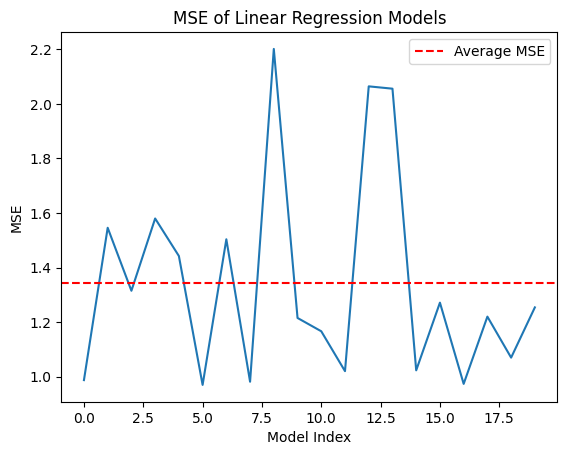

In [4]:
import matplotlib.pyplot as plt
import numpy as np

average_error = np.mean(errors)

plt.plot(errors)
plt.axhline(average_error, color='r', linestyle='--', label='Average MSE')
plt.xlabel('Model Index')
plt.ylabel('MSE')
plt.title('MSE of Linear Regression Models')
plt.legend()
plt.show()

### Get Best Model

In [5]:
best_model_index = errors.index(min(errors))
best_model = models[best_model_index]

print('Best Model MSE', errors[best_model_index])

Best Model MSE 0.9701399054650165


### Save Model

In [6]:
import joblib

joblib.dump(best_model, f'../models/model.pkl')

categories = {col: list(features[col].unique()) for col in features.columns}
joblib.dump(categories, f'../models/categories.pkl')

['../models/categories.pkl']